In [1]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import h5py
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os
from statsmodels import robust
from scipy.stats import mode

In [2]:
data = Table.read('/arc/home/aydanmckay/gaiahike/bp_rp_apogee.fits').to_pandas()

In [3]:
data.shape

(642528, 230)

In [4]:
data.describe()

,sfd_ebv,gaiaedr3_phot_g_mean_mag,source_id,fe_h,m_h,alpha_m,logg,teff,ra,dec,...,rpe_46,rpe_47,rpe_48,rpe_49,rpe_50,rpe_51,rpe_52,rpe_53,rpe_54,rpe_55
count,535928.000000,642528.000000,6.425280e+05,572305.000000,572279.000000,572028.000000,608715.000000,608715.000000,642528.000000,642528.000000,...,642528.000000,642528.000000,642528.000000,642528.000000,642528.000000,642528.000000,642528.000000,642528.000000,642528.000000,642528.000000
mean,0.220359,13.210278,2.830327e+18,-0.234036,-0.234631,0.072114,3.094697,5013.174316,175.519527,7.960083,...,4.854111,3.789136,3.838794,3.560125,3.602133,3.097025,2.747941,2.496227,1.032372,0.588982
std,1.075900,1.901047,1.841647e+18,0.371935,0.375699,0.102390,1.222225,1338.826050,95.943660,41.185402,...,96.112526,67.441620,71.901985,66.543945,66.796387,54.086079,48.531826,42.599335,16.954266,12.840849
min,0.002474,2.651680,2.851858e+12,-2.468600,-2.468600,-0.714365,-0.482825,3100.844482,0.000103,-87.224808,...,0.091793,0.084758,0.064332,0.065701,0.075551,0.055099,0.053387,0.048981,0.023190,0.011225
25%,0.029444,11.959400,1.313496e+18,-0.404150,-0.402940,0.004917,2.308385,4412.790039,89.839767,-23.176965,...,0.500238,0.453001,0.441088,0.393016,0.400751,0.367162,0.324858,0.293619,0.110627,0.056413
50%,0.062410,13.144300,2.536361e+18,-0.174640,-0.176610,0.042937,2.995981,4800.755859,178.490082,16.192937,...,0.972698,0.823608,0.848126,0.764647,0.757259,0.689114,0.592611,0.531611,0.203665,0.104177
75%,0.208363,14.581500,4.204890e+18,0.009171,0.008376,0.109349,4.314407,5223.474609,261.744846,41.740414,...,2.151097,1.763614,1.771294,1.627090,1.622607,1.431115,1.250225,1.124677,0.462224,0.240940
max,62.374294,20.164499,6.917528e+18,0.957890,0.968570,0.992785,5.370551,19869.988281,359.999181,87.608246,...,44037.816406,31293.429688,33479.109375,28020.875000,29163.664062,23545.835938,22205.037109,19124.441406,7081.585449,5876.122559


In [5]:
data['source_id'].value_counts()

1460648219080249728    18
1460672614494496384    18
1460712231272847232    17
1460678318211047168    17
1460685980432727808    17
                       ..
2950244479083172480     1
2950244307284483968     1
2950243826248148480     1
2950242795457889792     1
4973733245878903936     1
Name: source_id, Length: 574027, dtype: int64

In [44]:
interest = data[data['source_id'] == 1460648219080249728]

In [45]:
interest

,sfd_ebv,gaiaedr3_phot_g_mean_mag,source_id,fe_h,m_h,alpha_m,logg,teff,ra,dec,...,rpe_46,rpe_47,rpe_48,rpe_49,rpe_50,rpe_51,rpe_52,rpe_53,rpe_54,rpe_55
379202,0.009649,13.5297,1460648219080249728,-0.055821,-0.063214,-0.029000,4.600015,4268.810547,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379203,0.009649,13.5297,1460648219080249728,-0.060685,-0.064384,-0.038755,4.598063,4279.094727,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379204,0.009649,13.5297,1460648219080249728,-0.056448,-0.062191,-0.037503,4.601876,4296.236816,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379205,0.009649,13.5297,1460648219080249728,-0.054550,-0.064873,-0.019277,4.601713,4289.830566,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379206,0.009649,13.5297,1460648219080249728,-0.009659,-0.017223,-0.047126,4.613088,4275.988770,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379207,0.009649,13.5297,1460648219080249728,-0.048552,-0.057704,-0.037102,4.599060,4271.112305,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379208,0.009649,13.5297,1460648219080249728,-0.051452,-0.058716,-0.044263,4.600379,4275.285645,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379209,0.009649,13.5297,1460648219080249728,-0.035511,-0.045868,-0.028118,4.602138,4276.457520,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379210,0.009649,13.5297,1460648219080249728,-0.033206,-0.042950,-0.045791,4.613082,4260.847168,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414
379211,0.009649,13.5297,1460648219080249728,-0.057877,-0.068781,-0.041720,4.597523,4267.312500,194.473513,27.157068,...,0.749874,0.622709,0.644665,0.631463,0.628147,0.517515,0.446455,0.4142,0.135511,0.079414


In [5]:
with pd.option_context('mode.use_inf_as_na', True):
    data.dropna(inplace=True)
data.shape

(481813, 230)

In [6]:
filtered_data = pd.read_parquet('/arc/projects/k-pop/catalogues/calsurvey/apogee_dr17_filtered.parquet')

In [7]:
filtered_data.describe()

,dr3_source_id,ra,dec,rv,e_rv,teff,e_teff,logg,e_logg,feh,e_feh,alpha_fe,e_alpha_fe
count,4.434060e+05,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000,443406.000000
mean,2.774002e+18,178.723979,9.644786,2.214927,0.036713,4827.999023,15.221148,2.923352,0.026355,-0.212366,0.008838,0.070619,0.017817
std,1.820563e+18,96.123753,39.870482,67.839027,0.020856,664.161987,11.848849,1.216017,0.006843,0.342651,0.002392,0.096021,0.031677
min,0.000000e+00,0.000832,-87.081848,-588.899963,0.017150,3109.360352,2.461126,-0.482825,0.011948,-2.403300,0.003032,-0.493915,0.002055
25%,1.302895e+18,95.504841,-17.452337,-30.741168,0.024817,4403.511353,7.609871,2.137777,0.021908,-0.384170,0.007193,0.006592,0.005681
50%,2.474928e+18,179.754462,17.465758,-2.781958,0.030328,4783.643799,10.458469,2.671292,0.025058,-0.162350,0.008478,0.042049,0.007258
75%,4.137853e+18,264.446461,42.095646,27.046778,0.040982,5113.204468,17.889339,4.173988,0.029359,0.016209,0.010213,0.103843,0.010216
max,6.917528e+18,359.999181,87.608246,987.586426,0.992906,6867.221191,126.988701,5.266317,0.243832,0.588080,0.040597,0.773195,0.569886


In [8]:
lens = filtered_data['dr3_source_id'].value_counts()
lens

0                      1165
1460684709121087232      16
1463699260767522304      16
1460733225071924736      16
1460732022483047424      16
                       ... 
5214702347363647872       1
667894490002144640        1
924272048656630144        1
673661325410538880        1
2772098031734496512       1
Name: dr3_source_id, Length: 401420, dtype: int64

In [9]:
lens.value_counts()

1       368754
2        27595
3         3979
4          622
5          136
6           59
7           40
11          39
8           38
9           38
10          32
12          30
13          21
15          18
14          14
16           4
1165         1
Name: dr3_source_id, dtype: int64

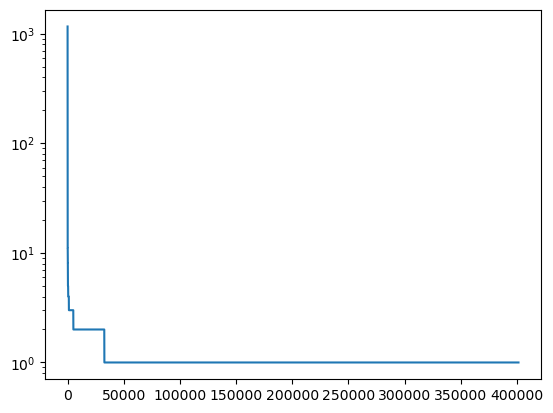

In [10]:
plt.semilogy(range(len(lens.values)),lens.values)

In [8]:
with pd.option_context('mode.use_inf_as_na', True):
    filtered_data.dropna(inplace=True)
filtered_data.shape

(443406, 15)

In [12]:
%%bash
pwd

/arc/home/aydanmckay/ml/torchnn


In [13]:
os.chdir('/arc/home/aydanmckay')

In [14]:
filtered_data.to_csv('apogee_dr17_filtered.csv')

In [15]:
input_survey = 'apogee_dr17_filtered.csv'
output_survey = 'apogee_dr17_filtered_dr3.csv'
to_write_survey = 'apogee_dr17_filtered_dr3.csv'

In [16]:
cds_dr3 = 'I/355/xpsummary'

In [17]:
match_radius = 1.

In [18]:
stilts_command = "stilts cdsskymatch \
                  cdstable=%s  find=best-remote \
                  in=%s ifmt=csv \
                  ra=ra dec=dec radius=%d \
                  out=%s ofmt=csv" %(cds_dr3, input_survey, match_radius, output_survey)

In [19]:
%%time
os.system(stilts_command)

CPU times: user 8.41 ms, sys: 3.82 ms, total: 12.2 ms
Wall time: 53.4 s


0

In [20]:
newcat = pd.read_csv(output_survey)

In [21]:
newcat.columns

Index(['col1', 'dr3_source_id', 'origin', 'origin_id', 'ra', 'dec', 'rv',
       'e_rv', 'teff', 'e_teff', 'logg', 'e_logg', 'feh', 'e_feh', 'alpha_fe',
       'e_alpha_fe', 'Source', 'RAdeg', 'DEdeg', 'SolID', 'NBPbases',
       'BPrelsh', 'NBP', 'NBPrej', 'BPstddev', 'BPchi2r', 'NTransBP',
       'NcTransBP', 'NbTransBP', 'NRPbases', 'NRPrelsh', 'NRP', 'NRPrej',
       'RPstdev', 'RPchi2r', 'NTransRP', 'NcTransRP', 'NbTransRP', 'angDist'],
      dtype='object')

In [22]:
req_cols = ['origin', 'origin_id', 'ra', 'dec', 'rv', 'e_rv', 'teff', 'e_teff', 'logg', 'e_logg', 'feh', 'e_feh', 'alpha_fe', 'e_alpha_fe', 'Source', 'angDist']

In [23]:
req_cols_names = ['origin', 'origin_id', 'ra', 'dec', 'rv', 'e_rv', 'teff', 'e_teff', 'logg', 'e_logg', 'feh', 'e_feh', 'alpha_fe', 'e_alpha_fe', 'dr3_source_id', 'angDist']

In [24]:
newcat = newcat[req_cols]

In [25]:
newcat.describe()

,ra,dec,rv,e_rv,teff,e_teff,logg,e_logg,feh,e_feh,alpha_fe,e_alpha_fe,Source,angDist
count,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,3.801620e+05,380162.000000
mean,176.050757,10.192162,1.834178,0.036416,4834.705732,15.042730,2.845358,0.026503,-0.217038,0.008811,0.072969,0.016941,2.762913e+18,0.225084
std,95.913267,41.359775,69.682012,0.020792,650.128842,11.822392,1.180720,0.006759,0.344559,0.002326,0.096010,0.030862,1.850966e+18,0.202315
min,0.000832,-87.081848,-588.899960,0.017150,3110.661100,2.461126,-0.482826,0.012058,-2.403300,0.003032,-0.493915,0.002224,2.851858e+12,0.000136
25%,92.338865,-20.471472,-32.218794,0.024596,4431.156375,7.549055,2.082693,0.022092,-0.390715,0.007208,0.008599,0.005697,1.292652e+18,0.087310
50%,176.309147,21.030878,-3.762600,0.029957,4784.862800,10.309724,2.599427,0.025195,-0.166660,0.008460,0.044484,0.007210,2.219823e+18,0.153588
75%,262.283883,43.592350,26.437717,0.040494,5090.501500,17.181895,4.041139,0.029478,0.013417,0.010157,0.105389,0.009974,4.186516e+18,0.289411
max,359.999181,87.608246,987.586400,0.992906,6866.401400,126.988700,5.266317,0.243832,0.577610,0.033660,0.750265,0.429395,6.917528e+18,0.999997


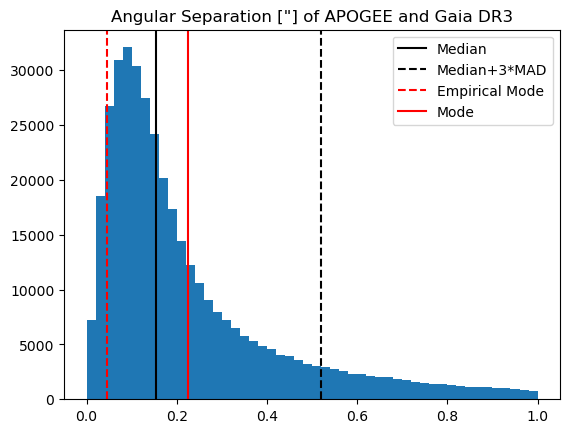

In [72]:
plt.hist(newcat['angDist'],bins=50)
plt.title('Angular Separation [\"] of APOGEE and Gaia DR3')
# Determining the median
median = np.nanmedian(newcat['angDist'])
plt.axvline(median,c='k',label='Median')
# Determining the Median Absolute Deviation
mad = robust.mad(newcat['angDist'][np.isnan(newcat['angDist']) == False])
plt.axvline(median+3*mad,c='k',linestyle='dashed',label=r'Median+3*MAD')
# Determining the empirically derived mode
empmode = 2.5*np.nanmedian(newcat['angDist']) - 1.5*np.nanmean(newcat['angDist'])
plt.axvline(empmode,c='r',linestyle='dashed',label='Empirical Mode')
# Determining the actual mode
dermode = mode(newcat['angDist'][np.isnan(newcat['angDist']) == False])
plt.axvline(dermode[0],c='r',label='Mode')
plt.legend(fancybox=True)
plt.show()

In [74]:
mask = (newcat['angDist'] < (median+3*mad)) | (np.isnan(newcat['angDist']) == True)
newcat = newcat[mask]

Text(0.5, 1.0, 'Angular Separation ["] of APOGEE and Gaia DR3')

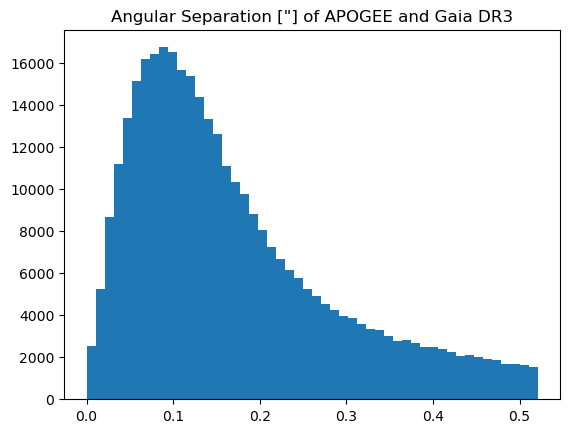

In [75]:
plt.hist(newcat['angDist'],bins=50)
plt.title('Angular Separation [\"] of APOGEE and Gaia DR3')

In [76]:
len(newcat)

341344

In [26]:
newcat.columns = req_cols_names

In [27]:
newcat.describe()

,ra,dec,rv,e_rv,teff,e_teff,logg,e_logg,feh,e_feh,alpha_fe,e_alpha_fe,dr3_source_id,angDist
count,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,380162.000000,3.801620e+05,380162.000000
mean,176.050757,10.192162,1.834178,0.036416,4834.705732,15.042730,2.845358,0.026503,-0.217038,0.008811,0.072969,0.016941,2.762913e+18,0.225084
std,95.913267,41.359775,69.682012,0.020792,650.128842,11.822392,1.180720,0.006759,0.344559,0.002326,0.096010,0.030862,1.850966e+18,0.202315
min,0.000832,-87.081848,-588.899960,0.017150,3110.661100,2.461126,-0.482826,0.012058,-2.403300,0.003032,-0.493915,0.002224,2.851858e+12,0.000136
25%,92.338865,-20.471472,-32.218794,0.024596,4431.156375,7.549055,2.082693,0.022092,-0.390715,0.007208,0.008599,0.005697,1.292652e+18,0.087310
50%,176.309147,21.030878,-3.762600,0.029957,4784.862800,10.309724,2.599427,0.025195,-0.166660,0.008460,0.044484,0.007210,2.219823e+18,0.153588
75%,262.283883,43.592350,26.437717,0.040494,5090.501500,17.181895,4.041139,0.029478,0.013417,0.010157,0.105389,0.009974,4.186516e+18,0.289411
max,359.999181,87.608246,987.586400,0.992906,6866.401400,126.988700,5.266317,0.243832,0.577610,0.033660,0.750265,0.429395,6.917528e+18,0.999997


In [28]:
newcat['dr3_source_id'].value_counts()

1460732022483047424    16
1460733225071924736    16
1460684709121087232    16
1460626538085406208    15
1460735110562596352    15
                       ..
975323026369288960      1
1136165364013710720     1
5287544378527322368     1
5288583000401013888     1
2773251488151338368     1
Name: dr3_source_id, Length: 345805, dtype: int64

In [33]:
newcat['dr3_source_id'].unique()

array([2413929812587459072,  422596679964513792,  421077597267551104, ...,
       1995077940400343424, 1995064673233436416, 2773251488151338368])

In [36]:
A = newcat['dr3_source_id'].unique()
B = data['source_id'].unique()
if(set(A).issubset(set(B))):
    print("Yes, column is subset of other.")

In [37]:
A

array([2413929812587459072,  422596679964513792,  421077597267551104, ...,
       1995077940400343424, 1995064673233436416, 2773251488151338368])

In [38]:
B

array([1866727481325405824, 1866723976632358400, 1866736414857386496, ...,
       4973559969718346496, 4973733555116549888, 4973733245878903936])

In [41]:
print(len(filtered_data['dr3_source_id'].values))
print(len(data['source_id'].values))
lens = list(set(list(data['source_id'].values)).intersection(list(filtered_data['dr3_source_id'].values)))
len(lens)

443406
481813


305073

Okay so all this has been done, all to figure out that the matching done by koposov was bad in the first place. Will needd to see if I can get my hands on the sample that the andrae paper uses. For now, Even though there are many repeats in the gaia data, I guess I will go through the filtered catalogue and match each of the gaia spectra on to each apogee row in filtered_apogee base on gaia source_id.

In [34]:
indexes = np.zeros(len(filtered_data))
for it,source_id in enumerate(filtered_data['dr3_source_id'].values):
    try:
        indexes[it] += data[data['source_id'] == source_id].index[0]
    except:
        indexes[it] *= np.nan

In [35]:
len(indexes)

443406

In [36]:
nans = indexes[np.isnan(indexes)]
notnans = indexes[~np.isnan(indexes)]

In [37]:
nans

array([nan, nan, nan, ..., nan, nan, nan])

In [38]:
len(nans)

101004

In [39]:
len(notnans)

342402

In [40]:
dfnotnans = pd.DataFrame(notnans)
dfnotnans = dfnotnans.dropna()
dfnotnans.describe()

,0
count,342402.000000
mean,315388.703737
std,187731.934427
min,0.000000
25%,148589.250000
50%,311365.500000
75%,490825.750000
max,642527.000000


okay so theres very many different ways I can approach this and I'm choosing using the filtered apogee dataset and taking the bp/rp spectra from the korposov table.

a.k.a. I choose not nans rather than the one I rematched.

In [83]:
data.loc[indexes[0]]

sfd_ebv                     2.039100e-02
gaiaedr3_phot_g_mean_mag    1.228820e+01
source_id                   2.413930e+18
fe_h                       -2.755300e-01
m_h                        -2.687500e-01
                                ...     
rpe_51                      2.691148e+00
rpe_52                      3.355407e+00
rpe_53                      2.969146e+00
rpe_54                      5.621693e-01
rpe_55                      2.346630e-01
Name: 172355, Length: 230, dtype: float64

In [21]:
# data = ["fe_h", "teff", "alpha_m", "logg", "gaiaedr3_phot_g_mean_mag"]
coeffs = ["bp_1", "bp_2", "bp_3", "bp_4", "bp_5", "bp_6", "bp_7",
          "bp_8", "bp_9", "bp_10", "bp_11", "bp_12", "bp_13", "bp_14",
          "bp_15", "bp_16", "bp_17", "bp_18", "bp_19", "bp_20", "bp_21",
          "bp_22", "bp_23", "bp_24", "bp_25", "bp_26", "bp_27", "bp_28",
          "bp_29", "bp_30", "bp_31", "bp_32", "bp_33", "bp_34", "bp_35",
          "bp_36", "bp_37", "bp_38", "bp_39", "bp_40", "bp_41", "bp_42",
          "bp_43", "bp_44", "bp_45", "bp_46", "bp_47", "bp_48", "bp_49",
          "bp_50", "bp_51", "bp_52", "bp_53", "bp_54", "bp_55", "rp_1",
          "rp_2", "rp_3", "rp_4", "rp_5", "rp_6", "rp_7", "rp_8",
          "rp_9", "rp_10", "rp_11", "rp_12", "rp_13", "rp_14", "rp_15",
          "rp_16", "rp_17", "rp_18", "rp_19", "rp_20", "rp_21", "rp_22",
          "rp_23", "rp_24", "rp_25", "rp_26", "rp_27", "rp_28", "rp_29",
          "rp_30", "rp_31", "rp_32", "rp_33", "rp_34", "rp_35", "rp_36",
          "rp_37", "rp_38", "rp_39", "rp_40", "rp_41", "rp_42", "rp_43",
          "rp_44", "rp_45", "rp_46", "rp_47", "rp_48", "rp_49", "rp_50",
          "rp_51", "rp_52", "rp_53", "rp_54", "rp_55", "bpe_1", "bpe_2",
          "bpe_3", "bpe_4", "bpe_5", "bpe_6", "bpe_7",
          "bpe_8", "bpe_9", "bpe_10", "bpe_11", "bpe_12", "bpe_13", "bpe_14",
          "bpe_15", "bpe_16", "bpe_17", "bpe_18", "bpe_19", "bpe_20", "bpe_21",
          "bpe_22", "bpe_23", "bpe_24", "bpe_25", "bpe_26", "bpe_27", "bpe_28",
          "bpe_29", "bpe_30", "bpe_31", "bpe_32", "bpe_33", "bpe_34", "bpe_35",
          "bpe_36", "bpe_37", "bpe_38", "bpe_39", "bpe_40", "bpe_41", "bpe_42",
          "bpe_43", "bpe_44", "bpe_45", "bpe_46", "bpe_47", "bpe_48", "bpe_49",
          "bpe_50", "bpe_51", "bpe_52", "bpe_53", "bpe_54", "bpe_55", "rpe_1",
          "rpe_2", "rpe_3", "rpe_4", "rpe_5", "rpe_6", "rpe_7", "rpe_8",
          "rpe_9", "rpe_10", "rpe_11", "rpe_12", "rpe_13", "rpe_14", "rpe_15",
          "rpe_16", "rpe_17", "rpe_18", "rpe_19", "rpe_20", "rpe_21", "rpe_22",
          "rpe_23", "rpe_24", "rpe_25", "rpe_26", "rpe_27", "rpe_28", "rpe_29",
          "rpe_30", "rpe_31", "rpe_32", "rpe_33", "rpe_34", "rpe_35", "rpe_36",
          "rpe_37", "rpe_38", "rpe_39", "rpe_40", "rpe_41", "rpe_42", "rpe_43",
          "rpe_44", "rpe_45", "rpe_46", "rpe_47", "rpe_48", "rpe_49", "rpe_50",
          "rpe_51", "rpe_52", "rpe_53", "rpe_54", "rpe_55"]

In [10]:
indexes = np.zeros(len(filtered_data))
labels = np.zeros((len(filtered_data),221))
for it,source_id in enumerate(filtered_data['dr3_source_id'].values):
    if it % 10000 == 0:
        print('percent through:',np.round(it/len(filtered_data)*100,3),'%')
    rows = data[data['source_id'] == source_id]
    if len(rows) == 1:
        indexes[it] += rows.index[0]
        for i in range(len(coeffs)):
            labels[it][i] += rows[coeffs[i]]
        labels[it][-1] += rows['gaiaedr3_phot_g_mean_mag']
    elif len(rows) > 1:
        indexes[it] += rows.index[0]
        row = rows.iloc[0]
        for i in range(len(coeffs)):
            labels[it][i] += row[coeffs[i]]
        labels[it][-1] += row['gaiaedr3_phot_g_mean_mag']
    else:
        indexes[it] *= np.nan
        for i in range(221):
            labels[it][i] *= np.nan

percent through: 0.0 %
percent through: 2.255 %
percent through: 4.511 %
percent through: 6.766 %
percent through: 9.021 %
percent through: 11.276 %
percent through: 13.532 %
percent through: 15.787 %
percent through: 18.042 %
percent through: 20.297 %
percent through: 22.553 %
percent through: 24.808 %
percent through: 27.063 %
percent through: 29.319 %
percent through: 31.574 %
percent through: 33.829 %
percent through: 36.084 %
percent through: 38.34 %
percent through: 40.595 %
percent through: 42.85 %
percent through: 45.105 %
percent through: 47.361 %
percent through: 49.616 %
percent through: 51.871 %
percent through: 54.126 %
percent through: 56.382 %
percent through: 58.637 %
percent through: 60.892 %
percent through: 63.148 %
percent through: 65.403 %
percent through: 67.658 %
percent through: 69.913 %
percent through: 72.169 %
percent through: 74.424 %
percent through: 76.679 %
percent through: 78.934 %
percent through: 81.19 %
percent through: 83.445 %
percent through: 85.7 

In [11]:
labels.shape

(443406, 221)

In [22]:
coeffs.append('gaiaedr3_phot_g_mean_mag')

In [23]:
df = pd.DataFrame(labels,columns=coeffs)

In [24]:
df.describe()

,bp_1,bp_2,bp_3,bp_4,bp_5,bp_6,bp_7,bp_8,bp_9,bp_10,...,rpe_47,rpe_48,rpe_49,rpe_50,rpe_51,rpe_52,rpe_53,rpe_54,rpe_55,gaiaedr3_phot_g_mean_mag
count,3.424020e+05,3.424020e+05,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,...,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000,342402.000000
mean,2.671836e+04,-2.837621e+03,-343.981465,150.437057,-128.803879,-108.922989,-97.071330,32.361527,-25.891302,23.077010,...,2.720376,2.669100,2.450735,2.494428,2.178612,1.958144,1.782559,0.731012,0.390974,12.542772
std,5.666241e+04,1.346723e+04,2185.118189,717.519207,428.148270,441.165549,598.533504,309.464364,288.752947,277.521968,...,11.323662,9.538583,8.711528,9.257615,7.886987,8.273557,7.776804,2.953671,1.700451,1.450741
min,5.988348e-01,-1.357148e+06,-44232.814183,-83693.048840,-9668.226340,-48061.438233,-206923.052687,-93231.280230,-20130.328339,-100281.896028,...,0.095173,0.092062,0.079094,0.086070,0.077468,0.073657,0.066643,0.023190,0.011225,6.480010
25%,4.148904e+03,-1.881410e+03,-563.231996,-10.554746,-147.923283,-101.718070,-96.811369,-0.019525,-44.299693,-0.912523,...,0.646365,0.677702,0.605680,0.596509,0.548623,0.467133,0.418367,0.157523,0.079792,11.607400
50%,1.092084e+04,-1.898909e+02,-212.396387,58.863733,-59.933977,-21.015674,-37.187803,10.151939,-15.095256,3.652954,...,1.084524,1.149003,1.041705,1.021084,0.921599,0.783065,0.699153,0.275178,0.142045,12.518800
75%,2.599127e+04,2.168634e+02,-49.762413,184.070150,-11.482683,12.560931,-7.146520,32.926882,-2.229436,13.114872,...,2.141424,2.174623,2.006537,1.996681,1.745767,1.522977,1.368975,0.575052,0.302250,13.450200
max,3.574747e+06,5.105616e+04,267344.548530,123288.001222,85710.752255,21652.692651,26766.130937,13841.376629,54854.613045,12290.275351,...,1674.321045,1539.906982,1321.518311,1168.297363,1195.052612,1363.943604,1321.233643,373.016571,213.430069,17.662001


In [14]:
dfna = df.dropna()

In [15]:
dfna.shape

(342402, 221)

In [16]:
# dfna.to_csv('labels_INTERMEDIARY_TABLE_TO_DELETE.csv')

In [26]:
filtered_apogee_gaia = pd.concat([filtered_data,df],axis=1)

In [27]:
filtered_apogee_gaia

,dr3_source_id,origin,origin_id,ra,dec,rv,e_rv,teff,e_teff,logg,...,rpe_47,rpe_48,rpe_49,rpe_50,rpe_51,rpe_52,rpe_53,rpe_54,rpe_55,gaiaedr3_phot_g_mean_mag
0,2413929812587459072,origin,b'2M00000019-1924498',0.000832,-19.413851,19.073862,0.038599,5501.772949,25.553564,4.304115,...,5.239434,3.061938,2.517801,2.378835,2.691148,3.355407,2.969146,0.562169,0.234663,12.2882
1,422596679964513792,origin,b'2M00000032+5737103',0.001335,57.619530,-20.545164,0.065306,6099.780762,45.847328,3.673970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,422596679964513792,origin,b'2M00000032+5737103',0.001335,57.619530,-20.434650,0.062999,6162.030273,41.753815,3.715561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,421077597267551104,origin,b'2M00000068+5710233',0.002850,57.173164,-12.673787,0.029277,5031.263672,10.145057,3.456132,...,0.947240,1.135843,1.086340,0.993323,0.905395,0.701949,0.628067,0.249728,0.139219,12.2759
4,2772097619417608704,origin,b'2M00000103+1525513',0.004322,15.430942,-12.087924,0.059875,5945.750977,44.246799,4.123192,...,1.057416,1.191314,1.041585,0.997540,0.963857,0.779477,0.703601,0.263982,0.126553,12.2821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443401,2011912391134705920,origin,b'2M23595669+6131251',359.986225,61.523659,-24.952900,0.033793,5008.395020,13.106046,2.480740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443402,2282127264957087872,origin,b'2M23595676+7918072',359.986523,79.302002,-38.772388,0.022091,4311.392578,6.555767,1.731429,...,1.647525,1.625572,1.444799,1.414323,1.433377,1.174501,1.147065,0.396197,0.194117,11.9400
443403,1998097371124974720,origin,b'2M23595886+5726058',359.995265,57.434956,-60.971943,0.025758,4859.908691,9.050734,2.480687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443404,1994741318040223232,origin,b'2M23595921+5609479',359.996744,56.163330,-56.440689,0.025620,4585.409668,11.298859,2.571437,...,0.401238,0.432257,0.437428,0.386484,0.394196,0.294734,0.265296,0.107126,0.053997,13.9818


In [28]:
%%bash

pwd

/arc/home/aydanmckay/ml/torchnn


In [29]:
os.chdir('/arc/home/aydanmckay/')

In [30]:
%%bash

pwd

/arc/home/aydanmckay


In [31]:
astropytable = Table.from_pandas(filtered_apogee_gaia)

In [32]:
astropytable.write('bp_rp_apogee_filtered.fits')